# Mining Value Chain Optimization - Comprehensive Workflow 
## Capstone Project: Machine Learning Engineering 
**Project:** Mining Value Chain Optimization 
**Dataset:** Operational, Environmental, and Logistics Data 
**Team Structure:**
 - **ML Lead:** Saidil Mifdal - System Architecture & Integration 
 - **ML Engineer A:** Farhan Hanif Azhary - Infrastructure & Operations Prediction 
 - **ML Engineer B:** Daffa Prawira - Fleet & Logistics Optimization 
 - **Objective:** Build end-to-end ML pipeline untuk prediksi dan optimasi operasi tambang dengan fokus pada: - Prediksi kecepatan jalan & cycle time (Infrastructure) - Prediksi kerusakan equipment & port operability (Fleet) - Risk scoring & recommendation system integration ---

## 1. Setup Environment

Import libraries untuk analisis data, visualisasi, dan statistical analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Infrastructure & Weather Data

Load dataset kondisi jalan dan cuaca untuk analisis korelasi antara kondisi lingkungan dengan performa operasional.

In [2]:
# Load road conditions data
df_roads = pd.read_csv('../../data/processed/fct_kondisi_jalan.csv')
df_roads['timestamp_utc'] = pd.to_datetime(df_roads['timestamp_utc'])
df_roads['tanggal'] = df_roads['timestamp_utc'].dt.date

print("=" * 70)
print("ROAD CONDITIONS DATA")
print("=" * 70)
print(f"Shape: {df_roads.shape}")
print(f"Date range: {df_roads['timestamp_utc'].min()} to {df_roads['timestamp_utc'].max()}")
print(f"\nColumns: {df_roads.columns.tolist()}")
print("\nFirst 5 rows:")
print(df_roads.head())

ROAD CONDITIONS DATA
Shape: (12000, 20)
Date range: 2025-06-30 22:00:00+00:00 to 2025-10-31 09:00:00+00:00

Columns: ['id_record_jalan', 'timestamp_utc', 'lokasi_kode', 'id_segmen_jalan', 'sumber_data', 'status_jalan', 'alasan_status', 'panjang_segmen_km', 'tipe_permukaan', 'kemiringan_pct', 'tikungan_kelas', 'kedalaman_air_cm', 'indeks_friksi', 'batas_kecepatan_km_jam', 'kecepatan_aktual_km_jam', 'waktu_tempuh_menit', 'ritase_terobservasi', 'Speed drop', 'Risk Indicator', 'tanggal']

First 5 rows:
  id_record_jalan             timestamp_utc lokasi_kode id_segmen_jalan  \
0    JREC_0000001 2025-06-30 22:00:00+00:00       PIT_A    SEG_PIT_A_01   
1    JREC_0000015 2025-06-30 22:00:00+00:00        PORT     SEG_PORT_03   
2    JREC_0000004 2025-06-30 22:00:00+00:00       PIT_B    SEG_PIT_B_01   
3    JREC_0000007 2025-06-30 22:00:00+00:00     ROAD_01  SEG_ROAD_01_01   
4    JREC_0000008 2025-06-30 22:00:00+00:00     ROAD_01  SEG_ROAD_01_02   

     sumber_data status_jalan alasan_status  

In [3]:
# Load weather data  
df_weather = pd.read_csv('../../data/processed/dim_cuaca_harian.csv')
df_weather['tanggal'] = pd.to_datetime(df_weather['tanggal']).dt.date


print("\n" + "=" * 70)
print("WEATHER DATA")
print("=" * 70)
print(f"Shape: {df_weather.shape}")
print(f"Date range: {df_weather['tanggal'].min()} to {df_weather['tanggal'].max()}")
print(f"\nColumns: {df_weather.columns.tolist()}")
print("\nFirst 5 rows:")
print(df_weather.head())


WEATHER DATA
Shape: (1225, 19)
Date range: 2025-03-01 to 2025-10-31

Columns: ['id_cuaca', 'tanggal', 'lokasi_kode', 'latitude', 'longitude', 'zona_waktu', 'hujan_mm', 'prob_hujan', 'intensitas_hujan', 'suhu_min_c', 'suhu_max_c', 'kelembaban_rh_avg', 'angin_kecepatan_avg_ms', 'angin_gust_max_ms', 'angin_arah_derajat', 'tekanan_hpa_avg', 'visibilitas_km_avg', 'wet_bulb_c', 'petir_count']

First 5 rows:
                 id_cuaca     tanggal lokasi_kode  latitude  longitude  \
0      CWC_20250301_PIT_A  2025-03-01       PIT_A     -1.95     116.85   
1      CWC_20250301_PIT_B  2025-03-01       PIT_B     -1.97     116.88   
2    CWC_20250301_ROAD_01  2025-03-01     ROAD_01     -1.96     116.90   
3  CWC_20250301_STOCKPILE  2025-03-01   STOCKPILE     -1.94     116.92   
4       CWC_20250301_PORT  2025-03-01        PORT     -1.93     116.95   

      zona_waktu  hujan_mm  prob_hujan intensitas_hujan  suhu_min_c  \
0  Asia/Makassar      60.4        0.91            Lebat        26.7   
1  Asia

## 3. Road Conditions Analysis

Analisis kondisi jalan: kecepatan rata-rata, indeks friksi, kemiringan, dan kedalaman air.

ROAD CONDITIONS - STATISTICAL SUMMARY
       panjang_segmen_km  kemiringan_pct  kedalaman_air_cm  indeks_friksi  \
count       12000.000000    12000.000000      12000.000000   12000.000000   
mean            1.944005        4.839175          0.628358       0.599567   
std             0.657571        2.121615          1.002765       0.106357   
min             0.990000        0.300000          0.000000       0.400000   
25%             1.270000        3.400000          0.000000       0.500000   
50%             1.960000        4.500000          0.300000       0.550000   
75%             2.640000        6.300000          0.900000       0.740000   
max             2.860000        9.600000          9.600000       0.750000   

       batas_kecepatan_km_jam  kecepatan_aktual_km_jam  waktu_tempuh_menit  \
count            12000.000000             12000.000000        12000.000000   
mean                36.240833                21.421517            6.719075   
std                  8.855095     

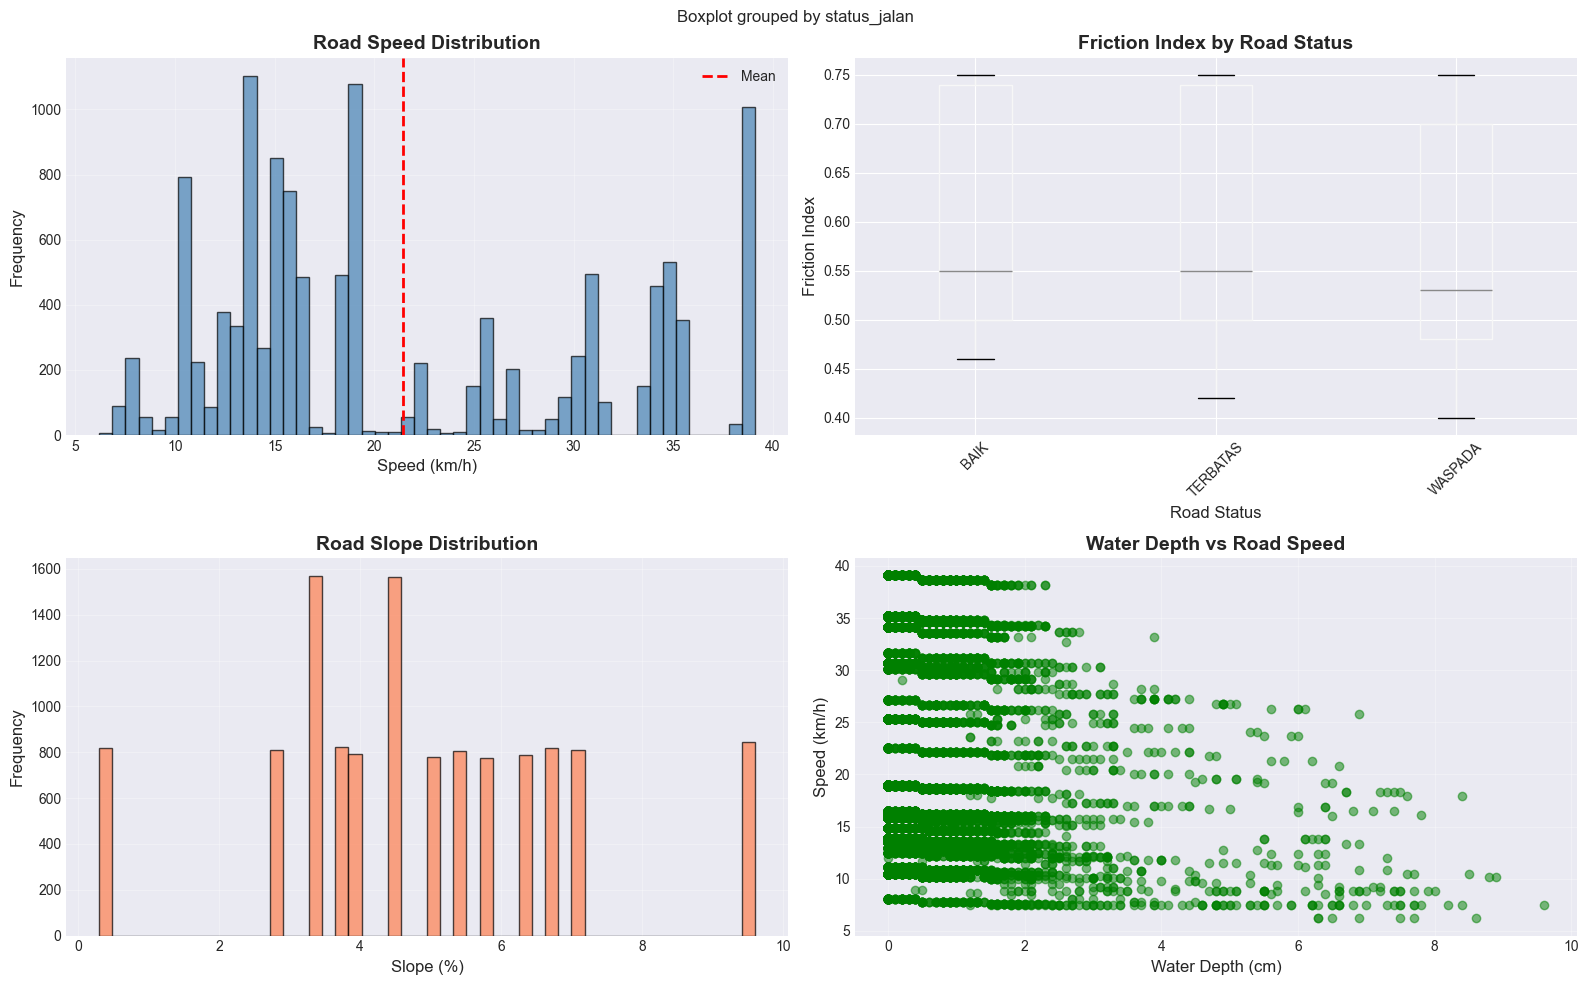


Key Insights:
- Average speed: 21.42 km/h
- Average friction index: 0.60
- Average slope: 4.84%
- Average water depth: 0.63 cm


In [4]:
# Statistical summary
print("=" * 70)
print("ROAD CONDITIONS - STATISTICAL SUMMARY")
print("=" * 70)
print(df_roads.describe())

# Check road status distribution
print("\n" + "=" * 70)
print("ROAD STATUS DISTRIBUTION")
print("=" * 70)
print(df_roads['status_jalan'].value_counts())
print(f"\nPercentage:")
print(df_roads['status_jalan'].value_counts(normalize=True) * 100)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Speed distribution
axes[0, 0].hist(df_roads['kecepatan_aktual_km_jam'].dropna(), bins=50, 
                 color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_roads['kecepatan_aktual_km_jam'].mean(), 
                    color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].set_xlabel('Speed (km/h)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Road Speed Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Friction index boxplot by road status
df_roads.boxplot(column='indeks_friksi', by='status_jalan', ax=axes[0, 1])
axes[0, 1].set_xlabel('Road Status', fontsize=12)
axes[0, 1].set_ylabel('Friction Index', fontsize=12)
axes[0, 1].set_title('Friction Index by Road Status', fontsize=14, fontweight='bold')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# 3. Slope distribution
axes[1, 0].hist(df_roads['kemiringan_pct'].dropna(), bins=50, 
                 color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Slope (%)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Road Slope Distribution', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Water depth vs speed
axes[1, 1].scatter(df_roads['kedalaman_air_cm'], df_roads['kecepatan_aktual_km_jam'], 
                    alpha=0.5, color='green')
axes[1, 1].set_xlabel('Water Depth (cm)', fontsize=12)
axes[1, 1].set_ylabel('Speed (km/h)', fontsize=12)
axes[1, 1].set_title('Water Depth vs Road Speed', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print(f"- Average speed: {df_roads['kecepatan_aktual_km_jam'].mean():.2f} km/h")
print(f"- Average friction index: {df_roads['indeks_friksi'].mean():.2f}")
print(f"- Average slope: {df_roads['kemiringan_pct'].mean():.2f}%")
print(f"- Average water depth: {df_roads['kedalaman_air_cm'].mean():.2f} cm")

## 4. Weather Analysis

Analisis pola cuaca: curah hujan, suhu, kelembaban, dan kecepatan angin.

WEATHER DATA - STATISTICAL SUMMARY
          latitude    longitude     hujan_mm   prob_hujan   suhu_min_c  \
count  1225.000000  1225.000000  1225.000000  1225.000000  1225.000000   
mean     -1.950000   116.900000    39.835755     0.484620    25.028490   
std       0.014148     0.034073    23.047561     0.290504     1.146783   
min      -1.970000   116.850000     0.200000     0.000000    23.000000   
25%      -1.960000   116.880000    20.400000     0.240000    24.000000   
50%      -1.950000   116.900000    39.500000     0.470000    25.000000   
75%      -1.940000   116.920000    59.900000     0.740000    26.000000   
max      -1.930000   116.950000    80.000000     1.000000    27.000000   

        suhu_max_c  kelembaban_rh_avg  angin_kecepatan_avg_ms  \
count  1225.000000        1225.000000             1225.000000   
mean     30.943837          80.348980                2.477796   
std       1.604247           8.625701                1.122911   
min      27.300000          65.100000 

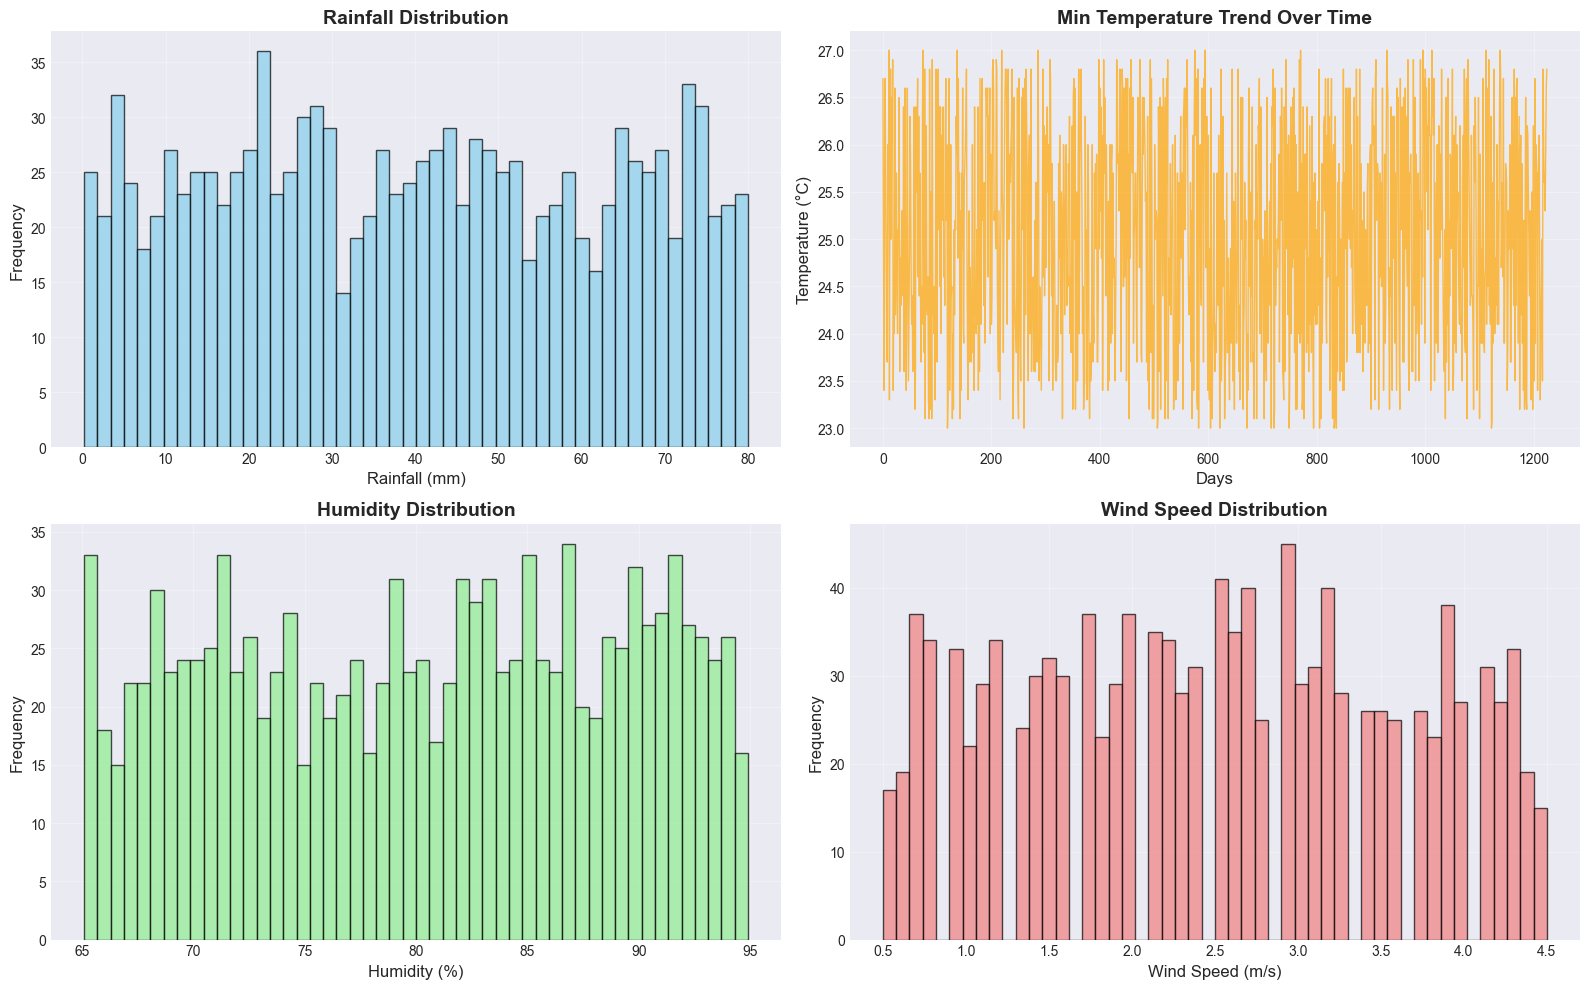


Key Insights:
- Average rainfall: 39.84 mm
- Max rainfall: 80.00 mm
- Rainy days: 1225 / 1225 days
- Average temp (min): 25.03°C
- Average temp (max): 30.94°C
- Average humidity: 80.35%
- Average wind speed: 2.48 m/s


In [5]:
# Statistical summary
print("=" * 70)
print("WEATHER DATA - STATISTICAL SUMMARY")
print("=" * 70)
print(df_weather.describe())

# Rainfall categorization
df_weather['rain_category'] = pd.cut(df_weather['hujan_mm'],
                                      bins=[-0.1, 0, 10, 50, 1000],
                                      labels=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain'])

print("\n" + "=" * 70)
print("RAINFALL CATEGORY DISTRIBUTION")
print("=" * 70)
print(df_weather['rain_category'].value_counts())

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Rainfall distribution
axes[0, 0].hist(df_weather['hujan_mm'].dropna(), bins=50, 
                 color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Rainfall (mm)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Rainfall Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Temperature trend over time (using min temp)
df_weather_sorted = df_weather.sort_values('tanggal')
axes[0, 1].plot(range(len(df_weather_sorted)), df_weather_sorted['suhu_min_c'].values, 
                 color='orange', linewidth=1, alpha=0.7)
axes[0, 1].set_xlabel('Days', fontsize=12)
axes[0, 1].set_ylabel('Temperature (°C)', fontsize=12)
axes[0, 1].set_title('Min Temperature Trend Over Time', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# 3. Humidity distribution
axes[1, 0].hist(df_weather['kelembaban_rh_avg'].dropna(), bins=50, 
                 color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Humidity (%)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Humidity Distribution', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Wind speed distribution (m/s)
axes[1, 1].hist(df_weather['angin_kecepatan_avg_ms'].dropna(), bins=50, 
                 color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Wind Speed (m/s)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Wind Speed Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print(f"- Average rainfall: {df_weather['hujan_mm'].mean():.2f} mm")
print(f"- Max rainfall: {df_weather['hujan_mm'].max():.2f} mm")
print(f"- Rainy days: {(df_weather['hujan_mm'] > 0).sum()} / {len(df_weather)} days")
print(f"- Average temp (min): {df_weather['suhu_min_c'].mean():.2f}°C")
print(f"- Average temp (max): {df_weather['suhu_max_c'].mean():.2f}°C")
print(f"- Average humidity: {df_weather['kelembaban_rh_avg'].mean():.2f}%")
print(f"- Average wind speed: {df_weather['angin_kecepatan_avg_ms'].mean():.2f} m/s")

## 5. Road-Weather Correlation Analysis

Analisis korelasi antara kondisi cuaca dengan performa jalan untuk mengidentifikasi faktor-faktor yang mempengaruhi kecepatan operasional.

MERGED DATA
Shape: (60000, 39)

Sample merged data:
  id_record_jalan             timestamp_utc lokasi_kode_road id_segmen_jalan  \
0    JREC_0000001 2025-06-30 22:00:00+00:00            PIT_A    SEG_PIT_A_01   
1    JREC_0000001 2025-06-30 22:00:00+00:00            PIT_A    SEG_PIT_A_01   
2    JREC_0000001 2025-06-30 22:00:00+00:00            PIT_A    SEG_PIT_A_01   
3    JREC_0000001 2025-06-30 22:00:00+00:00            PIT_A    SEG_PIT_A_01   
4    JREC_0000001 2025-06-30 22:00:00+00:00            PIT_A    SEG_PIT_A_01   

     sumber_data status_jalan alasan_status  panjang_segmen_km tipe_permukaan  \
0  Manual Survey         BAIK        Normal               2.64      Coal Road   
1  Manual Survey         BAIK        Normal               2.64      Coal Road   
2  Manual Survey         BAIK        Normal               2.64      Coal Road   
3  Manual Survey         BAIK        Normal               2.64      Coal Road   
4  Manual Survey         BAIK        Normal               2.64

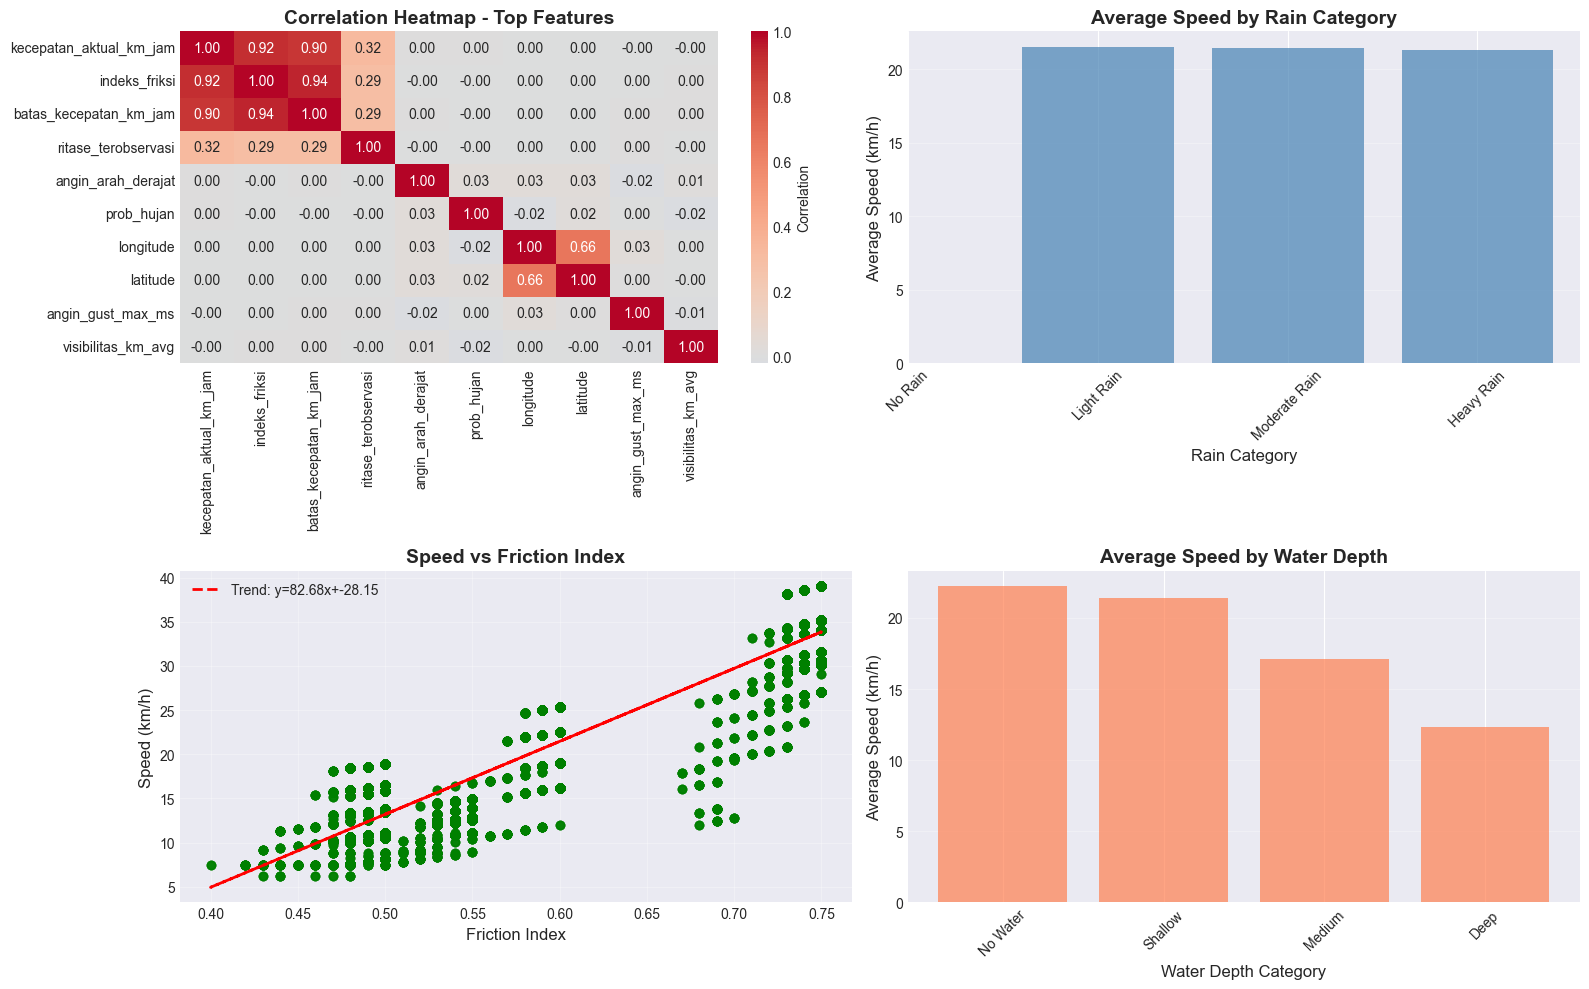


KEY FINDINGS - WEATHER IMPACT ON ROAD PERFORMANCE

1. Speed by Rain Category:
   - No Rain: nan km/h
   - Light Rain: 21.51 km/h
   - Moderate Rain: 21.47 km/h
   - Heavy Rain: 21.32 km/h

2. Speed by Water Depth:
   - No Water: 22.22 km/h
   - Shallow: 21.40 km/h
   - Medium: 17.08 km/h
   - Deep: 12.33 km/h

3. Top 5 Features Correlated with Speed:
   1. indeks_friksi: 0.918
   2. batas_kecepatan_km_jam: 0.896
   3. ritase_terobservasi: 0.320
   4. angin_arah_derajat: 0.005
   5. prob_hujan: 0.003


In [6]:
# Merge road and weather data by date
df_merged = df_roads.merge(df_weather, on='tanggal', how='left', suffixes=('_road', '_weather'))

print("=" * 70)
print("MERGED DATA")
print("=" * 70)
print(f"Shape: {df_merged.shape}")
print(f"\nSample merged data:")
print(df_merged.head())

# Correlation analysis
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns
correlation_matrix = df_merged[numeric_cols].corr()

# Extract key correlations with speed
speed_correlations = correlation_matrix['kecepatan_aktual_km_jam'].sort_values(ascending=False)

print("\n" + "=" * 70)
print("CORRELATION WITH ROAD SPEED")
print("=" * 70)
print(speed_correlations.head(10))

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Correlation heatmap (top features)
top_features = speed_correlations.head(10).index
corr_subset = df_merged[top_features].corr()

sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=axes[0, 0], cbar_kws={'label': 'Correlation'})
axes[0, 0].set_title('Correlation Heatmap - Top Features', fontsize=14, fontweight='bold')

# 2. Speed vs Rain Category
if 'rain_category' in df_merged.columns:
    speed_by_rain = df_merged.groupby('rain_category')['kecepatan_aktual_km_jam'].mean()
    axes[0, 1].bar(range(len(speed_by_rain)), speed_by_rain.values, 
                   color='steelblue', alpha=0.7)
    axes[0, 1].set_xticks(range(len(speed_by_rain)))
    axes[0, 1].set_xticklabels(speed_by_rain.index, rotation=45)
    axes[0, 1].set_xlabel('Rain Category', fontsize=12)
    axes[0, 1].set_ylabel('Average Speed (km/h)', fontsize=12)
    axes[0, 1].set_title('Average Speed by Rain Category', fontsize=14, fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Speed vs Friction Index
axes[1, 0].scatter(df_merged['indeks_friksi'], df_merged['kecepatan_aktual_km_jam'], 
                   alpha=0.5, color='green')
axes[1, 0].set_xlabel('Friction Index', fontsize=12)
axes[1, 0].set_ylabel('Speed (km/h)', fontsize=12)
axes[1, 0].set_title('Speed vs Friction Index', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Add regression line
from sklearn.linear_model import LinearRegression
valid_mask = df_merged[['indeks_friksi', 'kecepatan_aktual_km_jam']].notna().all(axis=1)
if valid_mask.sum() > 0:
    X = df_merged.loc[valid_mask, 'indeks_friksi'].values.reshape(-1, 1)
    y = df_merged.loc[valid_mask, 'kecepatan_aktual_km_jam'].values
    reg = LinearRegression().fit(X, y)
    axes[1, 0].plot(X, reg.predict(X), "r--", linewidth=2, label=f'Trend: y={reg.coef_[0]:.2f}x+{reg.intercept_:.2f}')
    axes[1, 0].legend()

# 4. Speed vs Water Depth
df_merged['water_category'] = pd.cut(df_merged['kedalaman_air_cm'],
                                      bins=[-0.1, 0, 2, 5, 100],
                                      labels=['No Water', 'Shallow', 'Medium', 'Deep'])

speed_by_water = df_merged.groupby('water_category')['kecepatan_aktual_km_jam'].mean()
axes[1, 1].bar(range(len(speed_by_water)), speed_by_water.values, 
               color='coral', alpha=0.7)
axes[1, 1].set_xticks(range(len(speed_by_water)))
axes[1, 1].set_xticklabels(speed_by_water.index, rotation=45)
axes[1, 1].set_xlabel('Water Depth Category', fontsize=12)
axes[1, 1].set_ylabel('Average Speed (km/h)', fontsize=12)
axes[1, 1].set_title('Average Speed by Water Depth', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Key findings
print("\n" + "=" * 70)
print("KEY FINDINGS - WEATHER IMPACT ON ROAD PERFORMANCE")
print("=" * 70)

if 'rain_category' in df_merged.columns:
    print("\n1. Speed by Rain Category:")
    for category in ['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain']:
        if category in speed_by_rain.index:
            speed_val = speed_by_rain[category]
            print(f"   - {category}: {speed_val:.2f} km/h")

if 'water_category' in df_merged.columns:
    print("\n2. Speed by Water Depth:")
    for category in speed_by_water.index:
        speed_val = speed_by_water[category]
        print(f"   - {category}: {speed_val:.2f} km/h")

print("\n3. Top 5 Features Correlated with Speed:")
for i, (feature, corr) in enumerate(speed_correlations[1:6].items(), 1):
    print(f"   {i}. {feature}: {corr:.3f}")

## 6. Feature Engineering Recommendations

Berdasarkan analisis EDA, berikut adalah rekomendasi fitur untuk modeling.

In [7]:
print("=" * 70)
print("FEATURE ENGINEERING RECOMMENDATIONS")
print("=" * 70)

recommendations = """
### 1. WEATHER-BASED FEATURES
   - rain_intensity: Kategori curah hujan (No/Light/Moderate/Heavy)
   - cumulative_rain_3d: Total hujan 3 hari terakhir
   - wet_condition_flag: Binary flag jika hujan > 10mm
   - humidity_category: High (>80%), Medium (60-80%), Low (<60%)
   - wind_risk_score: Kombinasi kecepatan angin & hujan

### 2. ROAD CONDITION FEATURES
   - friction_risk_score: Kombinasi indeks friksi & kedalaman air
   - slope_category: Flat (<5%), Moderate (5-15%), Steep (>15%)
   - water_depth_category: None/Shallow/Medium/Deep
   - road_quality_score: Composite score dari friction, slope, water depth

### 3. TEMPORAL FEATURES
   - hour_of_day: Jam operasi (0-23)
   - day_of_week: Hari dalam seminggu (0-6)
   - shift: Pagi/Siang/Malam
   - is_weekend: Binary flag untuk weekend
   - season: Musim (kemarau vs hujan based on rainfall pattern)

### 4. LAG FEATURES
   - speed_lag_1d: Kecepatan 1 hari sebelumnya
   - speed_lag_7d: Kecepatan 7 hari sebelumnya
   - rain_lag_1d: Curah hujan 1 hari sebelumnya
   - friction_lag_1d: Indeks friksi 1 hari sebelumnya

### 5. ROLLING STATISTICS
   - speed_rolling_mean_7d: Rata-rata kecepatan 7 hari terakhir
   - speed_rolling_std_7d: Standar deviasi kecepatan 7 hari terakhir
   - rain_rolling_sum_7d: Total hujan 7 hari terakhir
   - friction_rolling_mean_3d: Rata-rata friksi 3 hari terakhir

### 6. INTERACTION FEATURES
   - friction_x_slope: Interaksi antara friksi dan kemiringan
   - rain_x_water_depth: Interaksi antara hujan dan kedalaman air
   - friction_x_water: Interaksi antara friksi dan air
   - rain_x_road_status: Interaksi antara hujan dan status jalan

### 7. RISK INDICATORS
   - overall_risk_score: Composite risk dari weather + road condition
   - delay_probability: Probabilitas delay based on historical patterns
   - speed_degradation_index: Penurunan kecepatan dari baseline
"""

print(recommendations)

# Create sample features for demonstration
print("\n" + "=" * 70)
print("SAMPLE FEATURE ENGINEERING")
print("=" * 70)

# Create sample features
df_sample = df_merged.copy()

# 1. Rain intensity
df_sample['rain_intensity'] = pd.cut(df_sample['hujan_mm'],
                                      bins=[-0.1, 0, 10, 50, 1000],
                                      labels=[0, 1, 2, 3])  # 0=No, 1=Light, 2=Moderate, 3=Heavy

# 2. Friction risk score
df_sample['friction_risk_score'] = (1 - df_sample['indeks_friksi']) + (df_sample['kedalaman_air_cm'] / 10)

# 3. Temporal features (convert tanggal to datetime for operations)
df_sample['tanggal_dt'] = pd.to_datetime(df_sample['tanggal'])
df_sample['hour'] = df_sample['timestamp_utc'].dt.hour
df_sample['day_of_week'] = df_sample['tanggal_dt'].dt.dayofweek
df_sample['is_weekend'] = df_sample['day_of_week'].isin([5, 6]).astype(int)

print("\nSample features created:")
print(df_sample[['tanggal', 'rain_intensity', 'friction_risk_score', 'hour', 'is_weekend']].head(10))

print("\n" + "=" * 70)
print("NEXT STEPS")
print("=" * 70)
print("""
1. Implement all recommended features in feature engineering notebook
2. Test feature importance using Random Forest or XGBoost
3. Remove low-importance features (< 1% importance)
4. Handle multicollinearity (VIF > 10)
5. Normalize/standardize features for modeling
6. Save engineered dataset for model training

Key targets for ML Engineer A:
- Road Speed Prediction (Regression)
- Cycle Time Prediction (Regression)
- Road Risk Classification (Classification)
""")

FEATURE ENGINEERING RECOMMENDATIONS

### 1. WEATHER-BASED FEATURES
   - rain_intensity: Kategori curah hujan (No/Light/Moderate/Heavy)
   - cumulative_rain_3d: Total hujan 3 hari terakhir
   - wet_condition_flag: Binary flag jika hujan > 10mm
   - humidity_category: High (>80%), Medium (60-80%), Low (<60%)
   - wind_risk_score: Kombinasi kecepatan angin & hujan

### 2. ROAD CONDITION FEATURES
   - friction_risk_score: Kombinasi indeks friksi & kedalaman air
   - slope_category: Flat (<5%), Moderate (5-15%), Steep (>15%)
   - water_depth_category: None/Shallow/Medium/Deep
   - road_quality_score: Composite score dari friction, slope, water depth

### 3. TEMPORAL FEATURES
   - hour_of_day: Jam operasi (0-23)
   - day_of_week: Hari dalam seminggu (0-6)
   - shift: Pagi/Siang/Malam
   - is_weekend: Binary flag untuk weekend
   - season: Musim (kemarau vs hujan based on rainfall pattern)

### 4. LAG FEATURES
   - speed_lag_1d: Kecepatan 1 hari sebelumnya
   - speed_lag_7d: Kecepatan 7 hari 